# Lets Work on Creating a Human Activity Recognition Model

# Import and Install dependencies

In [39]:
pip install --upgrade --user mediapipe

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import time
import mediapipe as mp

# Keypoints using MP Holisitic

In [3]:
mp_holistic = mp.solutions.holistic #Holistic Model
mp_drawing = mp.solutions.drawing_utils  #drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks ,mp_holistic.FACEMESH_CONTOURS)    #(where to watch , which part to draw ,fit into the model)
    mp_drawing.draw_landmarks(image, results.pose_landmarks , mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks , mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks , mp_holistic.HAND_CONNECTIONS)

#Drawn the connections

In [7]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks ,mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), #for landmarks
                              mp_drawing.DrawingSpec(color=(80,151,50), thickness=2, circle_radius=1)) #for connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks , mp_holistic.POSE_CONNECTIONS,  
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), #for landmarks
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)) #for connections)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks , mp_holistic.HAND_CONNECTIONS,  
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), #for landmarks
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)) #for connections)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks , mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), #for landmarks
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) #for connections)

In [8]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [15]:
cap= cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:              #for higher/lower confidence  #we set up a model
    
    while cap.isOpened():
        #read feed 
        ret,frame=cap.read()

        #make detection 
        image, results = mediapipe_detection(frame, holistic)            #we wrote the created function and inserted the values
        print(results)

        #Draw landmark
        draw_styled_landmarks(frame, results)

        #show to simple_face_recognition_code.ipynb
        cv2.imshow('OpenCV feed', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


C:\Users\Aditya\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [16]:
len(results.right_hand_landmarks.landmark)

21

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
len(results.pose_landmarks.landmark)

33

In [14]:
len(results.face_landmarks.landmark)

468

In [28]:
frame

array([[[219, 204, 205],
        [219, 204, 205],
        [220, 205, 206],
        ...,
        [212, 205, 200],
        [212, 205, 200],
        [212, 205, 200]],

       [[219, 204, 205],
        [219, 204, 205],
        [220, 205, 206],
        ...,
        [213, 206, 201],
        [213, 206, 201],
        [213, 206, 201]],

       [[218, 203, 204],
        [219, 204, 205],
        [219, 204, 205],
        ...,
        [213, 206, 201],
        [213, 206, 201],
        [213, 206, 201]],

       ...,

       [[ 65,  56,  69],
        [ 65,  56,  69],
        [ 65,  56,  69],
        ...,
        [182, 175, 170],
        [182, 175, 170],
        [182, 175, 170]],

       [[ 63,  54,  67],
        [ 64,  55,  68],
        [ 64,  55,  68],
        ...,
        [182, 175, 170],
        [182, 175, 170],
        [182, 175, 170]],

       [[ 63,  54,  67],
        [ 63,  54,  67],
        [ 64,  55,  68],
        ...,
        [182, 175, 170],
        [182, 175, 170],
        [182, 175, 170]]

In [33]:
draw_landmarks(frame, results)

<Figure size 700x400 with 0 Axes>

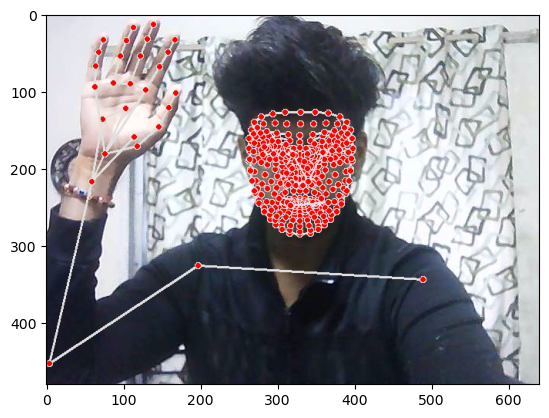

<Figure size 700x400 with 0 Axes>

In [66]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))
plt.figure(figsize=(7,4))

In [80]:
draw_styled_landmarks(image, results)

<Figure size 700x400 with 0 Axes>

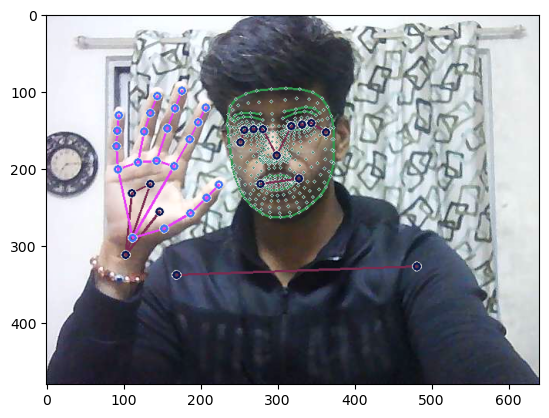

<Figure size 700x400 with 0 Axes>

In [82]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))
plt.figure(figsize=(7,4))

# EXTRACT KEYPOINT VALUES

In [34]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [28]:
pose

[array([ 0.3579174 ,  0.37050989, -0.93019021,  0.9999584 ]),
 array([ 0.37722552,  0.29695806, -0.84048527,  0.99992317]),
 array([ 0.39706641,  0.29504174, -0.84030038,  0.99993092]),
 array([ 0.41304001,  0.2938835 , -0.8396908 ,  0.9999187 ]),
 array([ 0.31067878,  0.31154019, -0.8706829 ,  0.99991179]),
 array([ 0.28814965,  0.31921202, -0.87030965,  0.99989998]),
 array([ 0.27153516,  0.32681388, -0.87071788,  0.99986577]),
 array([ 0.4267281 ,  0.31843457, -0.33619422,  0.99994642]),
 array([ 0.24775048,  0.37136671, -0.45693263,  0.99994648]),
 array([ 0.40130538,  0.43843803, -0.7497015 ,  0.99995536]),
 array([ 0.32766205,  0.45153889, -0.78351438,  0.99995339]),
 array([ 0.57458562,  0.65325624, -0.01890118,  0.99968821]),
 array([ 0.16661452,  0.76185602, -0.44509092,  0.99514073]),
 array([ 0.90436584,  0.81669527, -0.66199189,  0.99451172]),
 array([ 0.2030077 ,  1.2683512 , -0.73296177,  0.51477176]),
 array([ 0.69972837,  0.30232832, -1.33224607,  0.99824125]),
 array([

In [17]:
pose=np.array([[res.x,res.y,res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

 WE putted on the dimentions into an array

If we dont have landmarks of any specific part , then we are gonna pass array of same shape 


In [18]:
np.zeros(21*3)           #If we didnt have the landmarks for right/left hand 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
results.pose_landmarks

landmark {
  x: 0.333022296
  y: 0.474916875
  z: -1.02849543
  visibility: 0.999692798
}
landmark {
  x: 0.349468768
  y: 0.396280259
  z: -0.949550331
  visibility: 0.999496877
}
landmark {
  x: 0.365916789
  y: 0.392819464
  z: -0.949482918
  visibility: 0.999522507
}
landmark {
  x: 0.383155137
  y: 0.390459031
  z: -0.949068069
  visibility: 0.99947536
}
landmark {
  x: 0.2917009
  y: 0.41541478
  z: -0.963747
  visibility: 0.999493122
}
landmark {
  x: 0.271546215
  y: 0.42426756
  z: -0.963457465
  visibility: 0.999421895
}
landmark {
  x: 0.253939927
  y: 0.432601273
  z: -0.963972211
  visibility: 0.999335
}
landmark {
  x: 0.412281513
  y: 0.413884163
  z: -0.507782102
  visibility: 0.999507248
}
landmark {
  x: 0.229927212
  y: 0.469649971
  z: -0.547111034
  visibility: 0.999657452
}
landmark {
  x: 0.370782375
  y: 0.536804
  z: -0.86539042
  visibility: 0.99954468
}
landmark {
  x: 0.309748024
  y: 0.550316453
  z: -0.878283679
  visibility: 0.99968636
}
landmark {
  x: 0

In [20]:
results.face_landmarks

landmark {
  x: 0.535013676
  y: 0.298247814
  z: -0.0357321464
}
landmark {
  x: 0.535585821
  y: 0.246198386
  z: -0.0488988608
}
landmark {
  x: 0.537297964
  y: 0.266348541
  z: -0.0293530654
}
landmark {
  x: 0.533317804
  y: 0.206004739
  z: -0.029595118
}
landmark {
  x: 0.53639245
  y: 0.232006788
  z: -0.0503963381
}
landmark {
  x: 0.538661599
  y: 0.216430068
  z: -0.0443898365
}
landmark {
  x: 0.545556
  y: 0.181308791
  z: -0.0131453006
}
landmark {
  x: 0.485320687
  y: 0.181815952
  z: 0.0313806608
}
landmark {
  x: 0.549677253
  y: 0.150163
  z: -0.0026183154
}
landmark {
  x: 0.551325
  y: 0.13198933
  z: -0.00159394299
}
landmark {
  x: 0.558228731
  y: 0.0752087682
  z: 0.0186035093
}
landmark {
  x: 0.534617
  y: 0.305499911
  z: -0.0353031531
}
landmark {
  x: 0.534679174
  y: 0.312280446
  z: -0.03263041
}
landmark {
  x: 0.535089195
  y: 0.316322863
  z: -0.0289503094
}
landmark {
  x: 0.534941554
  y: 0.32069838
  z: -0.0288673136
}
landmark {
  x: 0.53417623
 

In [21]:
results.left_hand_landmarks

In [22]:
results.right_hand_landmarks

landmark {
  x: 0.248493403
  y: 0.288652778
  z: 3.90024297e-007
}
landmark {
  x: 0.304680258
  y: 0.274015605
  z: -0.0216408651
}
landmark {
  x: 0.351879656
  y: 0.227502286
  z: -0.0276758838
}
landmark {
  x: 0.379480302
  y: 0.175095066
  z: -0.0326381922
}
landmark {
  x: 0.403013319
  y: 0.137373611
  z: -0.037546467
}
landmark {
  x: 0.331565738
  y: 0.123393975
  z: -0.00658518262
}
landmark {
  x: 0.360045373
  y: 0.0624749586
  z: -0.0213197749
}
landmark {
  x: 0.379253864
  y: 0.0246823579
  z: -0.0354931392
}
landmark {
  x: 0.396404356
  y: -0.00525560975
  z: -0.0453099236
}
landmark {
  x: 0.301231861
  y: 0.100807697
  z: -0.00609585084
}
landmark {
  x: 0.324315161
  y: 0.0280646756
  z: -0.0179172531
}
landmark {
  x: 0.341022
  y: -0.0148714036
  z: -0.03111393
}
landmark {
  x: 0.356889099
  y: -0.047270745
  z: -0.0407142341
}
landmark {
  x: 0.268225
  y: 0.0956832
  z: -0.00949370395
}
landmark {
  x: 0.280278504
  y: 0.0234349
  z: -0.0229266211
}
landmark 

In [18]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,lh,rh,face])

In [19]:
result_test=extract_keypoints(results).shape

In [20]:
result_test

(1662,)

In [21]:
468*3 + 33*4 + 21*3 + 21*3

1662

In [22]:
extract_keypoints(results)[:10]      #first 10 values

array([ 0.59206319,  0.42053053, -0.68144429,  0.99997735,  0.62208974,
        0.36849883, -0.61736929,  0.99994093,  0.63918281,  0.37027147])

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([1662])

# Setup Folders for Collection

In [26]:
import os

In [27]:
#path for exported data, numpy arrays
DATA_PATH= os.path.join('MP_Dataa')

#actions that we try to detect
actions=np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth data 
no_sequences = 30 

#videos are going to 30 frames in length
sequence_length=30

In [32]:
#hello 
##0
##1
##2
##3
#......#29

#thanks

#i love you 

In [28]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH , action, str(sequence)))
        except:
            pass

# Collect keypoint values for training and testing

In [47]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(frame, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Aditya\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


We have collected the data , image by image , of 30 videos , each of 30 frames length

# Preprocess Data and Create Labels and Features

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map= {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [32]:
sequences, label = [] , []
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res= np.load(os.path.join(DATA_PATH , action ,str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        label.append(label_map[action])
            


In [33]:
np.array(sequences).shape

(90, 30, 1662)

In [34]:
np.array(label).shape

(90,)

In [35]:
x=np.array(sequences)

In [36]:
x.shape

(90, 30, 1662)

In [37]:
y=to_categorical(label).astype(int)

In [38]:
y              #[1,0,0] is hello   #[0,1,0] is thank you   #[0,0,1] is iloveyou

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.05)

In [40]:
x_train.shape

(85, 30, 1662)

In [41]:
x_test.shape

(5, 30, 1662)

In [42]:
y_train.shape

(85, 3)

In [43]:
y_test.shape

(5, 3)

# Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir=os.path.join('Logs')
tb_callbacks= TensorBoard(log_dir=log_dir)

In [67]:
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))



C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
x.shape

(90, 30, 1662)

In [68]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'] )

#categorical_crossentropy  #we have used multiclass classification model , thats why we have used categorical_crossentropy
#for regression model, we can use regression_crossentropy
#for binary model, same....

In [57]:
model.fit(x_train , y_train , epochs=500 , callbacks=[tb_callbacks])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - categorical_accuracy: 0.4735 - loss: 4.7366
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - categorical_accuracy: 0.2016 - loss: 4.6037
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - categorical_accuracy: 0.2329 - loss: 2.2437
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - categorical_accuracy: 0.3757 - loss: 3.4647
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - categorical_accuracy: 0.2798 - loss: 4.4775
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - categorical_accuracy: 0.2818 - loss: 1.3946
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - categorical_accuracy: 0.4089 - loss: 1.3392
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - categorical_accuracy: 0.3855 - loss: 1.1585
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - categorical_accuracy: 0.3034 - loss: 1.1203
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - categorical_accuracy: 0.3835 - loss: 1.1521
Epoch 11/500
3/3 ━━━━━━━━━━━━

KeyboardInterrupt: 

for seeing the live accuracy , go to cmd prompt

-cd Logs

-cd train

dir

tensorboard --logdir=.

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# Make Predictions

In [59]:
pr=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


In [60]:
actions[np.argmax(pr[0])]

'hello'

In [61]:
actions[np.argmax(y_test[0])]

'hello'

In [62]:
actions[np.argmax(pr[1])] , actions[np.argmax(y_test[1])]

('iloveyou', 'iloveyou')

In [63]:
actions[np.argmax(pr[4])] , actions[np.argmax(y_test[4])]

('thanks', 'thanks')

So we are getting proper outputs

# Save Weights

In [64]:
model.save('actions.h5')

In [65]:
del model

In [69]:
model.load_weights('actions.h5')      #we have reloaded the model after deleting

# Evaluation using Confusion Matrix and Accuracy

In [70]:
from sklearn.metrics import confusion_matrix , multilabel_confusion_matrix , accuracy_score

In [71]:
yhat=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


In [72]:
y_true= np.argmax(y_test , axis=1).tolist()
yhat = np.argmax(yhat , axis=1).tolist()

In [73]:
multilabel_confusion_matrix(y_true , yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

So we got almost a good confusion matrix model , the matrix is filled with TRUE-POSITIVE & TRUE-NGEATIVE

In [74]:
accuracy_score(y_true , yhat)*100    #best accuracy

100.0

In [75]:
#form examining the training model:
yhat=model.predict(x_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [76]:
y_true= np.argmax(y_train , axis=1).tolist()
yhat = np.argmax(yhat , axis=1).tolist()

In [79]:
multilabel_confusion_matrix(y_true , yhat)

array([[[53,  3],
        [ 1, 28]],

       [[56,  1],
        [ 3, 25]],

       [[54,  3],
        [ 3, 25]]], dtype=int64)

In [80]:
accuracy_score(y_true , yhat)*100      #good accuracy

91.76470588235294

# Test In Real Time

In [88]:
colors = [(245,117,16), (117,245,16), (16,117,245)]           #created the function
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [89]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.3

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)           #extraction
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):        #for the hold between actions 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)           #for the ouput in categorical format
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Aditya\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [217]:
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[1.02801152e-07, 9.99538660e-01, 4.61252843e-04],
       [7.13368282e-02, 1.70653872e-02, 9.11597848e-01],
       [2.44256551e-03, 6.12679243e-01, 3.84878218e-01],
       [2.09021270e-02, 5.25549985e-04, 9.78572369e-01],
       [8.78312767e-01, 9.51896654e-05, 1.21592045e-01]], dtype=float32)

In [219]:
x_test.shape

(5, 30, 1662)

In [223]:
x_test[0].shape    #but we want in the format of (1,30,1662)

(30, 1662)

In [222]:
#thats why
np.expand_dims(x_test[0], axis=0).shape

(1, 30, 1662)

In [224]:
model.predict(x_test[0])    #if we look for the one value, its gonna throw  an error as because of the shape

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None